In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("hyderabad_listings_1000_synthetic.csv")

In [4]:
print(df.shape)

(1000, 9)


In [5]:
print(df.head())

       Area Listing_Type Parking Furnished  Bedrooms  Bathrooms  Size_Sqft  \
0  Kompally         Sale     Yes        No         3          2       1403   
1      ECIL         Rent     Yes        No         2          2       1087   
2      ECIL         Rent     Yes        No         3          2       1345   
3     Alwal         Rent     Yes        No         2          1       1071   
4  Ameerpet         Sale     Yes        No         2          2       1199   

     Price        Price_Type  
0  9864199    Sale_Price_INR  
1    13148  Monthly_Rent_INR  
2    16496  Monthly_Rent_INR  
3    13921  Monthly_Rent_INR  
4  7727952    Sale_Price_INR  


In [6]:
display(df.head())

,Area,Listing_Type,Parking,Furnished,Bedrooms,Bathrooms,Size_Sqft,Price,Price_Type
0,Kompally,Sale,Yes,No,3,2,1403,9864199,Sale_Price_INR
1,ECIL,Rent,Yes,No,2,2,1087,13148,Monthly_Rent_INR
2,ECIL,Rent,Yes,No,3,2,1345,16496,Monthly_Rent_INR
3,Alwal,Rent,Yes,No,2,1,1071,13921,Monthly_Rent_INR
4,Ameerpet,Sale,Yes,No,2,2,1199,7727952,Sale_Price_INR


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Area          1000 non-null   object
 1   Listing_Type  1000 non-null   object
 2   Parking       1000 non-null   object
 3   Furnished     1000 non-null   object
 4   Bedrooms      1000 non-null   int64 
 5   Bathrooms     1000 non-null   int64 
 6   Size_Sqft     1000 non-null   int64 
 7   Price         1000 non-null   int64 
 8   Price_Type    1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB
None


In [8]:
print(df.isna().sum())

Area            0
Listing_Type    0
Parking         0
Furnished       0
Bedrooms        0
Bathrooms       0
Size_Sqft       0
Price           0
Price_Type      0
dtype: int64


In [9]:
print(df['Area'].value_counts())

Area
Kompally       100
ECIL           100
Alwal          100
Ameerpet       100
Bowenpally     100
Madhapur       100
Hitech City    100
Sainikpuri     100
Gachibowli     100
Kukatpally     100
Name: count, dtype: int64


In [10]:
print(df['Price_Type'].value_counts())

Price_Type
Sale_Price_INR      513
Monthly_Rent_INR    487
Name: count, dtype: int64


In [11]:
print(df.groupby('Price_Type')['Price'].describe())

# .describe()

# This applies pandas describe(), which generates summary statistics for each group.

# The statistics include:

# count → number of entries

# mean → average price

# std → standard deviation

# min → minimum price

# 25%, 50%, 75% → quartiles (distribution spread)

# max → maximum price

                  count          mean           std        min        25%  \
Price_Type                                                                  
Monthly_Rent_INR  487.0  2.480993e+04  1.426585e+04     4162.0    13279.0   
Sale_Price_INR    513.0  9.433839e+06  3.895102e+06  2394547.0  6750763.0   

                        50%         75%         max  
Price_Type                                           
Monthly_Rent_INR    20619.0     34159.0     77559.0  
Sale_Price_INR    8631459.0  11623277.0  26936659.0  


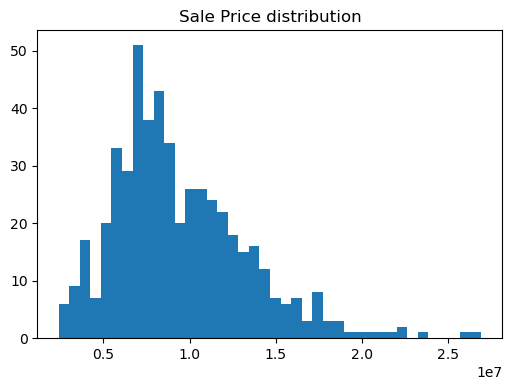

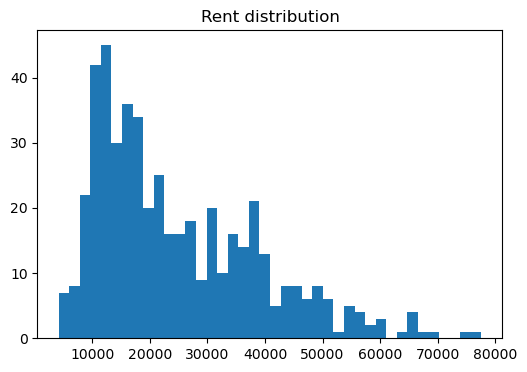

In [12]:
# Price histograms
plt.figure(figsize=(6,4)); plt.hist(df[df.Price_Type=='Sale_Price_INR']['Price'], bins=40); plt.title("Sale Price distribution"); plt.show()
plt.figure(figsize=(6,4)); plt.hist(df[df.Price_Type=='Monthly_Rent_INR']['Price'], bins=40); plt.title("Rent distribution"); plt.show()

In [13]:
df['Parking_bin'] = df['Parking'].map({'Yes':1,'No':0})
df['Furnished_bin'] = df['Furnished'].map({'Yes':1,'No':0})
df.tail()


,Area,Listing_Type,Parking,Furnished,Bedrooms,Bathrooms,Size_Sqft,Price,Price_Type,Parking_bin,Furnished_bin
995,Madhapur,Rent,Yes,No,4,4,1818,55166,Monthly_Rent_INR,1,0
996,Gachibowli,Rent,Yes,No,2,2,1046,44519,Monthly_Rent_INR,1,0
997,Bowenpally,Rent,Yes,Yes,2,2,1096,17380,Monthly_Rent_INR,1,1
998,Ameerpet,Sale,Yes,No,3,2,1842,14437945,Sale_Price_INR,1,0
999,Madhapur,Rent,No,No,2,1,1125,44312,Monthly_Rent_INR,0,0


In [14]:
sale_df = df[df['Price_Type']=='Sale_Price_INR'].copy()
rent_df = df[df['Price_Type']=='Monthly_Rent_INR'].copy()
 


In [15]:
# choose features
cat_cols = ['Area']
num_cols = ['Bedrooms','Bathrooms','Size_Sqft','Parking_bin','Furnished_bin']

In [16]:
# simple one-hot
def make_X_y(df_in):
    X = pd.get_dummies(df_in[cat_cols + num_cols], columns=cat_cols,dtype=int)
    y = df_in['Price'].values
    return X, y


# Using drop_first=True

# Pandas drops the first column (alphabetically or category order).
# Suppose it drops Red. Now you only have:

# Color_Blue  Color_Green
# 0           0   → Red (baseline)
# 1           0   → Blue
# 0           1   → Green


# 👉 Now:

# If both columns are 0,0 → it’s Red (baseline).

# If 1,0 → it’s Blue.

# If 0,1 → it’s Green.

# No redundancy, no trap.


In [17]:
X_sale, y_sale = make_X_y(sale_df)
X_rent, y_rent = make_X_y(rent_df)

In [18]:
X_sale.head()

,Bedrooms,Bathrooms,Size_Sqft,Parking_bin,Furnished_bin,Area_Alwal,Area_Ameerpet,Area_Bowenpally,Area_ECIL,Area_Gachibowli,Area_Hitech City,Area_Kompally,Area_Kukatpally,Area_Madhapur,Area_Sainikpuri
0,3,2,1403,1,0,0,0,0,0,0,0,1,0,0,0
4,2,2,1199,1,0,0,1,0,0,0,0,0,0,0,0
6,2,2,1326,0,0,1,0,0,0,0,0,0,0,0,0
8,2,1,1079,0,0,0,0,1,0,0,0,0,0,0,0
9,2,1,1168,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
X_rent.head()

,Bedrooms,Bathrooms,Size_Sqft,Parking_bin,Furnished_bin,Area_Alwal,Area_Ameerpet,Area_Bowenpally,Area_ECIL,Area_Gachibowli,Area_Hitech City,Area_Kompally,Area_Kukatpally,Area_Madhapur,Area_Sainikpuri
1,2,2,1087,1,0,0,0,0,1,0,0,0,0,0,0
2,3,2,1345,1,0,0,0,0,1,0,0,0,0,0,0
3,2,1,1071,1,0,1,0,0,0,0,0,0,0,0,0
5,2,2,834,0,0,1,0,0,0,0,0,0,0,0,0
7,3,2,1243,1,0,0,0,0,0,0,0,1,0,0,0


In [20]:
#   Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

#  Function to compare models
def compare_models(X, y, random_state=42):
    """
    Train multiple regression models and compare their performance.
    
    Parameters:
        X (DataFrame or array): Features
        y (Series or array): Target variable
        random_state (int): Random seed for reproducibility
    
    Returns:
        results_df (DataFrame): Table of model performance
        fitted (dict): Trained models with scalers (if applied)
        test_data (tuple): X_test, y_test for later use
    """
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Define candidate models
    models = {
        "Dummy_Median": DummyRegressor(strategy='median'),
        "Linear": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "DecisionTree": DecisionTreeRegressor(random_state=random_state),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1),
        "GradBoost": GradientBoostingRegressor(n_estimators=100, random_state=random_state),
        "HistGB": HistGradientBoostingRegressor(random_state=random_state),
        "KNN": KNeighborsRegressor(n_neighbors=5)
    }

    # Models that need scaling
    scale_models = {"Linear", "Ridge", "Lasso", "KNN"}

    results = []
    fitted = {}

    for name, model in models.items():
        # Copy train/test data
        Xtr, Xte = X_train.copy(), X_test.copy()
        scaler = None

        # Scale where needed
        if name in scale_models:
            scaler = StandardScaler()
            Xtr = scaler.fit_transform(Xtr)
            Xte = scaler.transform(Xte)

        # Train model
        model.fit(Xtr, y_train)
        preds = model.predict(Xte)

        # Evaluate metrics
        mae = mean_absolute_error(y_test, preds)
        mse = mean_squared_error(y_test, preds)
        rmse = root_mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # Save results
        results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2
        })

        # Save trained model + scaler
        fitted[name] = (model, scaler)

    # Convert results to DataFrame and sort by RMSE
    results_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
    
    return results_df, fitted, (X_test, y_test)


 
#   Example usage (with sale/rent data)
 

# Assuming you already have your features/targets prepared:
# X_sale, y_sale, X_rent, y_rent

sale_results, sale_fitted, sale_test_data = compare_models(X_sale, y_sale)
rent_results, rent_fitted, rent_test_data = compare_models(X_rent, y_rent)

print("===== Sale Results =====")
print(sale_results)

print("\n===== Rent Results =====")
print(rent_results)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+13, tolerance: 6.380e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.785e+07, tolerance: 8.024e+06
  model = cd_fast.enet_coordinate_descent(


===== Sale Results =====
          Model           MAE           MSE          RMSE        R2
0        HistGB  6.767164e+05  8.610317e+11  9.279179e+05  0.936088
1     GradBoost  7.039685e+05  8.688591e+11  9.321261e+05  0.935507
2  RandomForest  7.151769e+05  9.413128e+11  9.702128e+05  0.930129
3         Ridge  7.641923e+05  1.038749e+12  1.019190e+06  0.922896
4         Lasso  7.668778e+05  1.044347e+12  1.021933e+06  0.922481
5        Linear  7.668784e+05  1.044348e+12  1.021933e+06  0.922481
6  DecisionTree  9.415107e+05  1.887545e+12  1.373880e+06  0.859892
7           KNN  1.079701e+06  2.160985e+12  1.470029e+06  0.839596
8  Dummy_Median  2.821737e+06  1.422253e+13  3.771277e+06 -0.055701

===== Rent Results =====
          Model           MAE           MSE          RMSE        R2
0  DecisionTree   2368.683673  1.234236e+07   3513.168976  0.935021
1     GradBoost   2340.178529  1.272402e+07   3567.074710  0.933012
2  RandomForest   2297.936718  1.291892e+07   3594.290486  0.9319

In [21]:
from sklearn.model_selection import cross_val_score
def cv_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5, scale=False):
    if scale:
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import StandardScaler
        pipe = make_pipeline(StandardScaler(), model)
        scores = cross_val_score(pipe, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    else:
        scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    return -scores.mean(), scores.std()

# Example: CV for RandomForest on sale data
import numpy as np
rf = RandomForestRegressor(n_estimators=100, random_state=42)
mean_rmse, std_rmse = cv_score(rf, X_sale, y_sale, scoring='neg_root_mean_squared_error', cv=5, scale=False)
print("RF CV RMSE:", mean_rmse, "+/-", std_rmse)



# What Cross-Validation Does

# Split data into 5 equal parts (cv=5).

# Train on 4 parts, test on the 1 part.

# Repeat 5 times so each part gets tested once.

# Average all results → more reliable score.

# ⚽ Like judging a footballer over 5 matches instead of just 1.

# 🔹 The Code Explained

# cross_val_score → does splitting, training, and scoring automatically.

# Function inputs:

# model → algorithm (e.g., RandomForest).

# X → features (bedrooms, area, etc.).

# y → target (price).

# scoring='neg_root_mean_squared_error' → measure error (RMSE, lower = better).

# cv=5 → 5-fold cross-validation.

# scale → standardize data first (needed for Linear, KNN).

# 🔹 Inside the Function

# If scale=True → pipeline = StandardScaler + Model.

# If scale=False → run model directly.

# scores = list of RMSEs from each fold (like 5 match results).

# 🔹 Return Value

# -scores.mean() → average RMSE.

# scores.std() → variation between folds (consistency).

# 🔹 Example Run

# Train Random Forest with 5-fold CV.

# Output: RF CV RMSE: 500000 +/- 80000.

# Meaning → on average, model is off by ₹5,00,000, variation = ₹80,000.

# ✅ One-liner:
# Cross-validation = testing your model on multiple splits (like matches) and averaging, so results are stable and not biased by one lucky/unlucky split.

RF CV RMSE: 992505.9095268684 +/- 107714.05355360774


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
  "n_estimators": [100, 200],
  "max_depth": [None, 10],
  "min_samples_split": [2, 5]
}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
gs = GridSearchCV(rf, param_grid_rf, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)
gs.fit(X_sale, y_sale)
print("Best RF params:", gs.best_params_)
print("Best RF CV RMSE:", -gs.best_score_)
best_rf = gs.best_estimator_


Best RF params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best RF CV RMSE: 1039724.2119392175


Size_Sqft           0.551574
Area_Gachibowli     0.134962
Area_Hitech City    0.128869
Area_Madhapur       0.120325
Area_ECIL           0.013060
Area_Kukatpally     0.011085
Area_Bowenpally     0.009857
Bedrooms            0.008515
Area_Sainikpuri     0.006277
Furnished_bin       0.004582
Bathrooms           0.003029
Area_Alwal          0.002378
Area_Ameerpet       0.001922
Area_Kompally       0.001899
Parking_bin         0.001666
dtype: float64


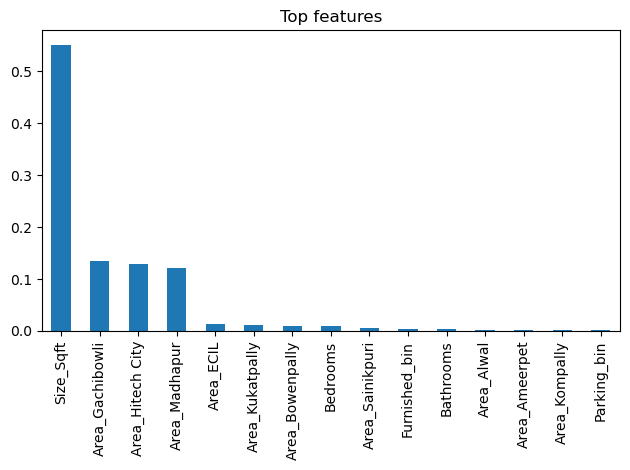

In [23]:
if hasattr(best_rf, 'feature_importances_'):
    feat_imp = pd.Series(best_rf.feature_importances_, index=X_sale.columns).sort_values(ascending=False)
    print(feat_imp.head(15))
    feat_imp.head(15).plot.bar(); plt.title("Top features"); plt.tight_layout(); plt.show()


In [31]:
import joblib
joblib.dump({"model": best_rf, "scaler": None, "features": list(X_sale.columns)}, "best_sale_model.pkl")


# Train Rent Model
rf_rent = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_rent.fit(X_rent, y_rent)

# Save rent model
import joblib
joblib.dump({"model": rf_rent, "scaler": None, "features": list(X_rent.columns)}, "best_rent_model.pkl")



['best_rent_model.pkl']

In [32]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, X_sale.shape[1]]))]
onnx_model = convert_sklearn(best_rf, initial_types=initial_type)
with open("best_sale_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


In [33]:
import joblib
import pandas as pd

# Load the saved Random Forest model
saved = joblib.load("best_sale_model.pkl")
model = saved["model"]

In [34]:
X_sale.head()

,Bedrooms,Bathrooms,Size_Sqft,Parking_bin,Furnished_bin,Area_Alwal,Area_Ameerpet,Area_Bowenpally,Area_ECIL,Area_Gachibowli,Area_Hitech City,Area_Kompally,Area_Kukatpally,Area_Madhapur,Area_Sainikpuri
0,3,2,1403,1,0,0,0,0,0,0,0,1,0,0,0
4,2,2,1199,1,0,0,1,0,0,0,0,0,0,0,0
6,2,2,1326,0,0,1,0,0,0,0,0,0,0,0,0
8,2,1,1079,0,0,0,0,1,0,0,0,0,0,0,0
9,2,1,1168,0,0,0,0,0,0,0,0,0,0,1,0


In [35]:
# Example new house
# 3 Bedrooms, 2 Bathrooms, 1500 sqft, Parking Yes, Unfurnished, Hitech City
new_data_dict = {f: [0] for f in saved["features"]}  # initialize all columns with 0

# Fill in your actual data
new_data_dict["Bedrooms"] = [3]
new_data_dict["Bathrooms"] = [2]
new_data_dict["Size_Sqft"] = [2000]
new_data_dict["Parking_bin"] = [1]    # Yes
new_data_dict["Furnished_bin"] = [0]  # No

# One-hot encode area
new_data_dict["Area_Alwal"] = [1]  # Make sure this column exists
# other areas stay 0

# Convert to DataFrame
df_new = pd.DataFrame(new_data_dict)


In [36]:
predicted_price = model.predict(df_new)
print("Predicted Sale Price:", predicted_price[0])


Predicted Sale Price: 16689910.136189392


In [61]:
import joblib
import pandas as pd

# 1. Load your saved model
saved = joblib.load("best_rent_model.pkl")
model = saved["model"]
features = saved["features"]

# 2. Initialize all features with 0
new_data_dict = {f: [0] for f in features}

# 3. Fill in actual custom house details
# Example: 3 Bedrooms, 2 Bathrooms, 1500 sqft, Parking Yes, Unfurnished, Hitech City
new_data_dict["Bedrooms"] = [1]
new_data_dict["Bathrooms"] = [1]
new_data_dict["Size_Sqft"] = [700]
new_data_dict["Parking_bin"] = [0]    # Parking = Yes
new_data_dict["Furnished_bin"] = [0]  # Unfurnished

# One-hot encode the Area (only one area column should be 1)
if "Area_Hitech City" in new_data_dict:   # ensure column exists
    new_data_dict["Area_Hitech City"] = [1]

# 4. Convert to DataFrame
df_new = pd.DataFrame(new_data_dict)

# 5. Predict price
predicted_price = model.predict(df_new)
print("Predicted Rent  Price:", predicted_price[0])


Predicted Rent  Price: 24468.005


In [49]:
 
# 1. Load your saved rent model
saved = joblib.load("best_rent_model.pkl")
model = saved["model"]
features = saved["features"]

# 2. Define input type (number of features must match your training features)
initial_type = [('float_input', FloatTensorType([None, len(features)]))]

# 3. Convert to ONNX
onnx_model = convert_sklearn(model, initial_types=initial_type)

# 4. Save as .onnx file
with open("best_rent_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ Rent model saved as ONNX (best_rent_model.onnx)")


✅ Rent model saved as ONNX (best_rent_model.onnx)
